In [1]:
import numpy as np
from tqdm import tqdm
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import validation_curve
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import cross_validate
from statsmodels.stats.outliers_influence import variance_inflation_factor
from warnings import filterwarnings
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
filterwarnings('ignore')

In [2]:
# 데이터 불러오기

In [3]:
train_quality = pd.read_csv('data/train_quality_data.csv',  thousands=',', parse_dates=['time'])
train_problem = pd.read_csv('data/train_problem_data.csv',  thousands=',', parse_dates=['time'])
train_err     = pd.read_csv('data/train_err_data.csv'    ,  thousands=',', parse_dates=['time'])

In [6]:
# 정의
train_user_id_max = 24999
train_user_id_min = 10000
train_user_number = 15000

test_user_id_max = 44998
test_user_id_min = 30000
test_user_number = 14999


In [7]:
train_quality["quality_0"] = train_quality.quality_0.astype(float)
train_quality["quality_1"] = train_quality.quality_1.astype(float)
train_quality["quality_2"] = train_quality.quality_2.astype(float)
train_quality["quality_3"] = train_quality.quality_3.astype(float)
train_quality["quality_4"] = train_quality.quality_4.astype(float)
train_quality["quality_5"] = train_quality.quality_5.astype(float)
train_quality["quality_6"] = train_quality.quality_6.astype(float)
train_quality["quality_7"] = train_quality.quality_7.astype(float)
train_quality["quality_8"] = train_quality.quality_8.astype(float)
train_quality["quality_9"] = train_quality.quality_9.astype(float)
train_quality["quality_10"] = train_quality.quality_10.astype(float)
train_quality["quality_11"] = train_quality.quality_11.astype(float)
train_quality["quality_12"] = train_quality.quality_12.astype(float)

In [8]:
np.sort(train_err.errtype.unique()) # 41개, 29 제외

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42], dtype=int64)

In [9]:
train_problem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5429 entries, 0 to 5428
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   user_id  5429 non-null   int64         
 1   time     5429 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 85.0 KB


In [10]:
train_err.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16554663 entries, 0 to 16554662
Data columns (total 6 columns):
 #   Column    Dtype         
---  ------    -----         
 0   user_id   int64         
 1   time      datetime64[ns]
 2   model_nm  object        
 3   fwver     object        
 4   errtype   int64         
 5   errcode   object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 757.8+ MB


In [11]:
train_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828624 entries, 0 to 828623
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time        828624 non-null  datetime64[ns]
 1   user_id     828624 non-null  int64         
 2   fwver       788544 non-null  object        
 3   quality_0   684192 non-null  float64       
 4   quality_1   828624 non-null  float64       
 5   quality_2   788511 non-null  float64       
 6   quality_3   828624 non-null  float64       
 7   quality_4   828624 non-null  float64       
 8   quality_5   828604 non-null  float64       
 9   quality_6   828624 non-null  float64       
 10  quality_7   828624 non-null  float64       
 11  quality_8   828624 non-null  float64       
 12  quality_9   828624 non-null  float64       
 13  quality_10  828624 non-null  float64       
 14  quality_11  828624 non-null  float64       
 15  quality_12  828624 non-null  float64       
dtypes:

In [12]:
# train_quality fwver에 따른 오류 갯수

In [13]:
train_quality['fwver'].unique()

array(['05.15.2138', '04.22.1750', '04.16.3553', '04.33.1261',
       '04.22.1778', '04.33.1185', '04.16.3571', '05.66.3571',
       '03.11.1149', '03.11.1167', '04.82.1684', '04.82.1778',
       '04.33.1149', nan, '05.66.3237', '04.73.2237', '09.17.1431',
       '04.22.1684', '05.15.2120', '04.33.1125', '05.15.2122',
       '04.22.1666', '04.22.1656', '04.16.3439', '04.73.2571',
       '05.15.2114', '04.16.3345', '04.22.1442'], dtype=object)

In [14]:
train_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828624 entries, 0 to 828623
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time        828624 non-null  datetime64[ns]
 1   user_id     828624 non-null  int64         
 2   fwver       788544 non-null  object        
 3   quality_0   684192 non-null  float64       
 4   quality_1   828624 non-null  float64       
 5   quality_2   788511 non-null  float64       
 6   quality_3   828624 non-null  float64       
 7   quality_4   828624 non-null  float64       
 8   quality_5   828604 non-null  float64       
 9   quality_6   828624 non-null  float64       
 10  quality_7   828624 non-null  float64       
 11  quality_8   828624 non-null  float64       
 12  quality_9   828624 non-null  float64       
 13  quality_10  828624 non-null  float64       
 14  quality_11  828624 non-null  float64       
 15  quality_12  828624 non-null  float64       
dtypes:

In [15]:
train_quality.head()

,time,user_id,fwver,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
0,2020-11-29 09:00:00,10000,05.15.2138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
1,2020-11-29 09:00:00,10000,05.15.2138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
2,2020-11-29 09:00:00,10000,05.15.2138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
3,2020-11-29 09:00:00,10000,05.15.2138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
4,2020-11-29 09:00:00,10000,05.15.2138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0


In [16]:
train_quality['total_quality'] = train_quality['quality_0']+train_quality['quality_1']+train_quality['quality_2']+train_quality['quality_3']+train_quality['quality_4']+train_quality['quality_5']+train_quality['quality_6']+train_quality['quality_7']+train_quality['quality_8']+train_quality['quality_9']+train_quality['quality_10']+train_quality['quality_11']+train_quality['quality_12']

In [54]:
train_qulity_nan = train_quality.replace(0,np.NaN)
train_qulity_nan

,time,fwver,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12,total_quality
user_id,,,,,,,,,,,,,,,,
10000,2020-11-29 09:00:00,05.15.2138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,4.0
10000,2020-11-29 09:00:00,05.15.2138,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,8.0
10000,2020-11-30 21:00:00,05.15.2138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,8.0
10000,2020-11-30 21:00:00,05.15.2138,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,16.0
10002,2020-11-04 11:00:00,05.15.2138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24997,2020-11-24 03:30:00,04.22.1778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,17.0
24997,2020-11-24 03:30:00,04.22.1778,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,17.0,NaN,NaN,19.0
24997,2020-11-24 03:30:00,04.22.1778,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,17.0,NaN,NaN,18.0


In [63]:
# 펌웨어 별 퀄리티 오류
fwver_qulity = train_qulity_nan.groupby('fwver').count()[['quality_0','quality_1','quality_2','quality_3','quality_4','quality_5','quality_6','quality_7','quality_8','quality_9','quality_10','quality_11','quality_12']]
fwver_qulity.to_csv(PATH+'fwver_qulity.csv')


In [19]:
# user_id와 errtype만을 사용하여 데이터 셋 생성
# 모든 일자에 대해서 errtype별 발생 건수를 count
# pandas의 groupby를 활용할 경우 큰 연산 자원이 필요.
# numpy로 placeholder를 만들어 구현함.

id_error = train_err[['user_id','errtype']].values
error = np.zeros((train_user_number,42))

for person_idx, err in tqdm(id_error):
    # person_idx - train_user_id_min 위치에 person_idx, errtype에 해당하는 error값을 +1
    error[person_idx - train_user_id_min,err - 1] += 1
error.shape

100%|██████████| 16554663/16554663 [00:37<00:00, 442590.75it/s]


(15000, 42)

In [20]:
error

array([[  0.,   0.,   8., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ..., 113.,  56.,   1.],
       [  0.,   0.,   2., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,  58.,   8.,   5.],
       [  0.,   0.,   0., ...,   6.,   0.,   0.],
       [  0.,   0.,   4., ...,   0.,   0.,   0.]])

In [21]:
train_err.set_index('user_id',inplace=True)
train_quality.set_index('user_id',inplace=True)
train_problem.set_index('user_id',inplace=True)

# train quality 중복된 퀄리티 에러, 반복 시도로 간주, 삭제

In [22]:
train_quality = train_quality.drop_duplicates()
train_quality

,time,fwver,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12,total_quality
user_id,,,,,,,,,,,,,,,,
10000,2020-11-29 09:00:00,05.15.2138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0
10000,2020-11-29 09:00:00,05.15.2138,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,8.0
10000,2020-11-30 21:00:00,05.15.2138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,8.0
10000,2020-11-30 21:00:00,05.15.2138,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,16.0
10002,2020-11-04 11:00:00,05.15.2138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24997,2020-11-24 03:30:00,04.22.1778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,17.0
24997,2020-11-24 03:30:00,04.22.1778,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,19.0
24997,2020-11-24 03:30:00,04.22.1778,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,18.0


# train quality 상관관계

In [23]:
train_quality['fwver']

user_id
10000    05.15.2138
10000    05.15.2138
10000    05.15.2138
10000    05.15.2138
10002    05.15.2138
            ...    
24997    04.22.1778
24997    04.22.1778
24997    04.22.1778
24997    04.22.1778
24997    04.22.1778
Name: fwver, Length: 273289, dtype: object

In [24]:
dummy = pd.get_dummies(train_quality)
dummy

,time,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,...,fwver_04.73.2571,fwver_04.82.1684,fwver_04.82.1778,fwver_05.15.2114,fwver_05.15.2120,fwver_05.15.2122,fwver_05.15.2138,fwver_05.66.3237,fwver_05.66.3571,fwver_09.17.1431
user_id,,,,,,,,,,,,,,,,,,,,,
10000,2020-11-29 09:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
10000,2020-11-29 09:00:00,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
10000,2020-11-30 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
10000,2020-11-30 21:00:00,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
10002,2020-11-04 11:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24997,2020-11-24 03:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
24997,2020-11-24 03:30:00,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
24997,2020-11-24 03:30:00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
dummy.corr()

,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,...,fwver_04.73.2571,fwver_04.82.1684,fwver_04.82.1778,fwver_05.15.2114,fwver_05.15.2120,fwver_05.15.2122,fwver_05.15.2138,fwver_05.66.3237,fwver_05.66.3571,fwver_09.17.1431
quality_0,1.000000,0.002495,0.999535,NaN,NaN,0.067177,-0.000691,0.001315,-0.001783,0.627979,...,-0.000055,-0.000627,-0.000226,-0.000155,-0.000142,-0.000121,0.026657,-0.000405,-0.000154,0.000094
quality_1,0.002495,1.000000,0.002162,NaN,NaN,0.008520,0.024584,0.009523,0.666048,0.000563,...,-0.001073,-0.000318,-0.001450,0.000835,0.000765,0.000037,0.004809,-0.002264,-0.000145,0.009252
quality_2,0.999535,0.002162,1.000000,NaN,NaN,0.068473,0.001366,0.001180,-0.000311,0.597480,...,-0.000050,-0.000571,-0.000205,-0.000142,-0.000130,-0.000110,0.018731,-0.000368,-0.000140,-0.000090
quality_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
quality_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
quality_5,0.067177,0.008520,0.068473,NaN,NaN,1.000000,0.011878,0.016935,0.000063,0.045839,...,-0.000186,-0.002007,-0.000766,-0.000220,-0.000491,-0.000389,0.001602,-0.001377,-0.000484,0.002855
quality_6,-0.000691,0.024584,0.001366,NaN,NaN,0.011878,1.000000,0.693177,0.003544,0.002479,...,-0.000338,0.001140,-0.001177,-0.000884,0.006474,-0.000699,0.034521,-0.000995,0.001925,-0.003207
quality_7,0.001315,0.009523,0.001180,NaN,NaN,0.016935,0.693177,1.000000,0.002753,0.003253,...,-0.000308,0.000096,-0.001207,-0.000890,0.001735,-0.000689,0.048394,-0.001867,0.000292,-0.004466
quality_8,-0.001783,0.666048,-0.000311,NaN,NaN,0.000063,0.003544,0.002753,1.000000,-0.000564,...,-0.000102,-0.000299,0.000046,-0.000294,-0.000270,-0.000228,-0.002941,-0.000214,0.000206,0.006490
quality_9,0.627979,0.000563,0.597480,NaN,NaN,0.045839,0.002479,0.003253,-0.000564,1.000000,...,-0.000077,-0.000890,-0.000318,-0.000222,-0.000204,-0.000172,0.033207,-0.000571,-0.000218,0.000568


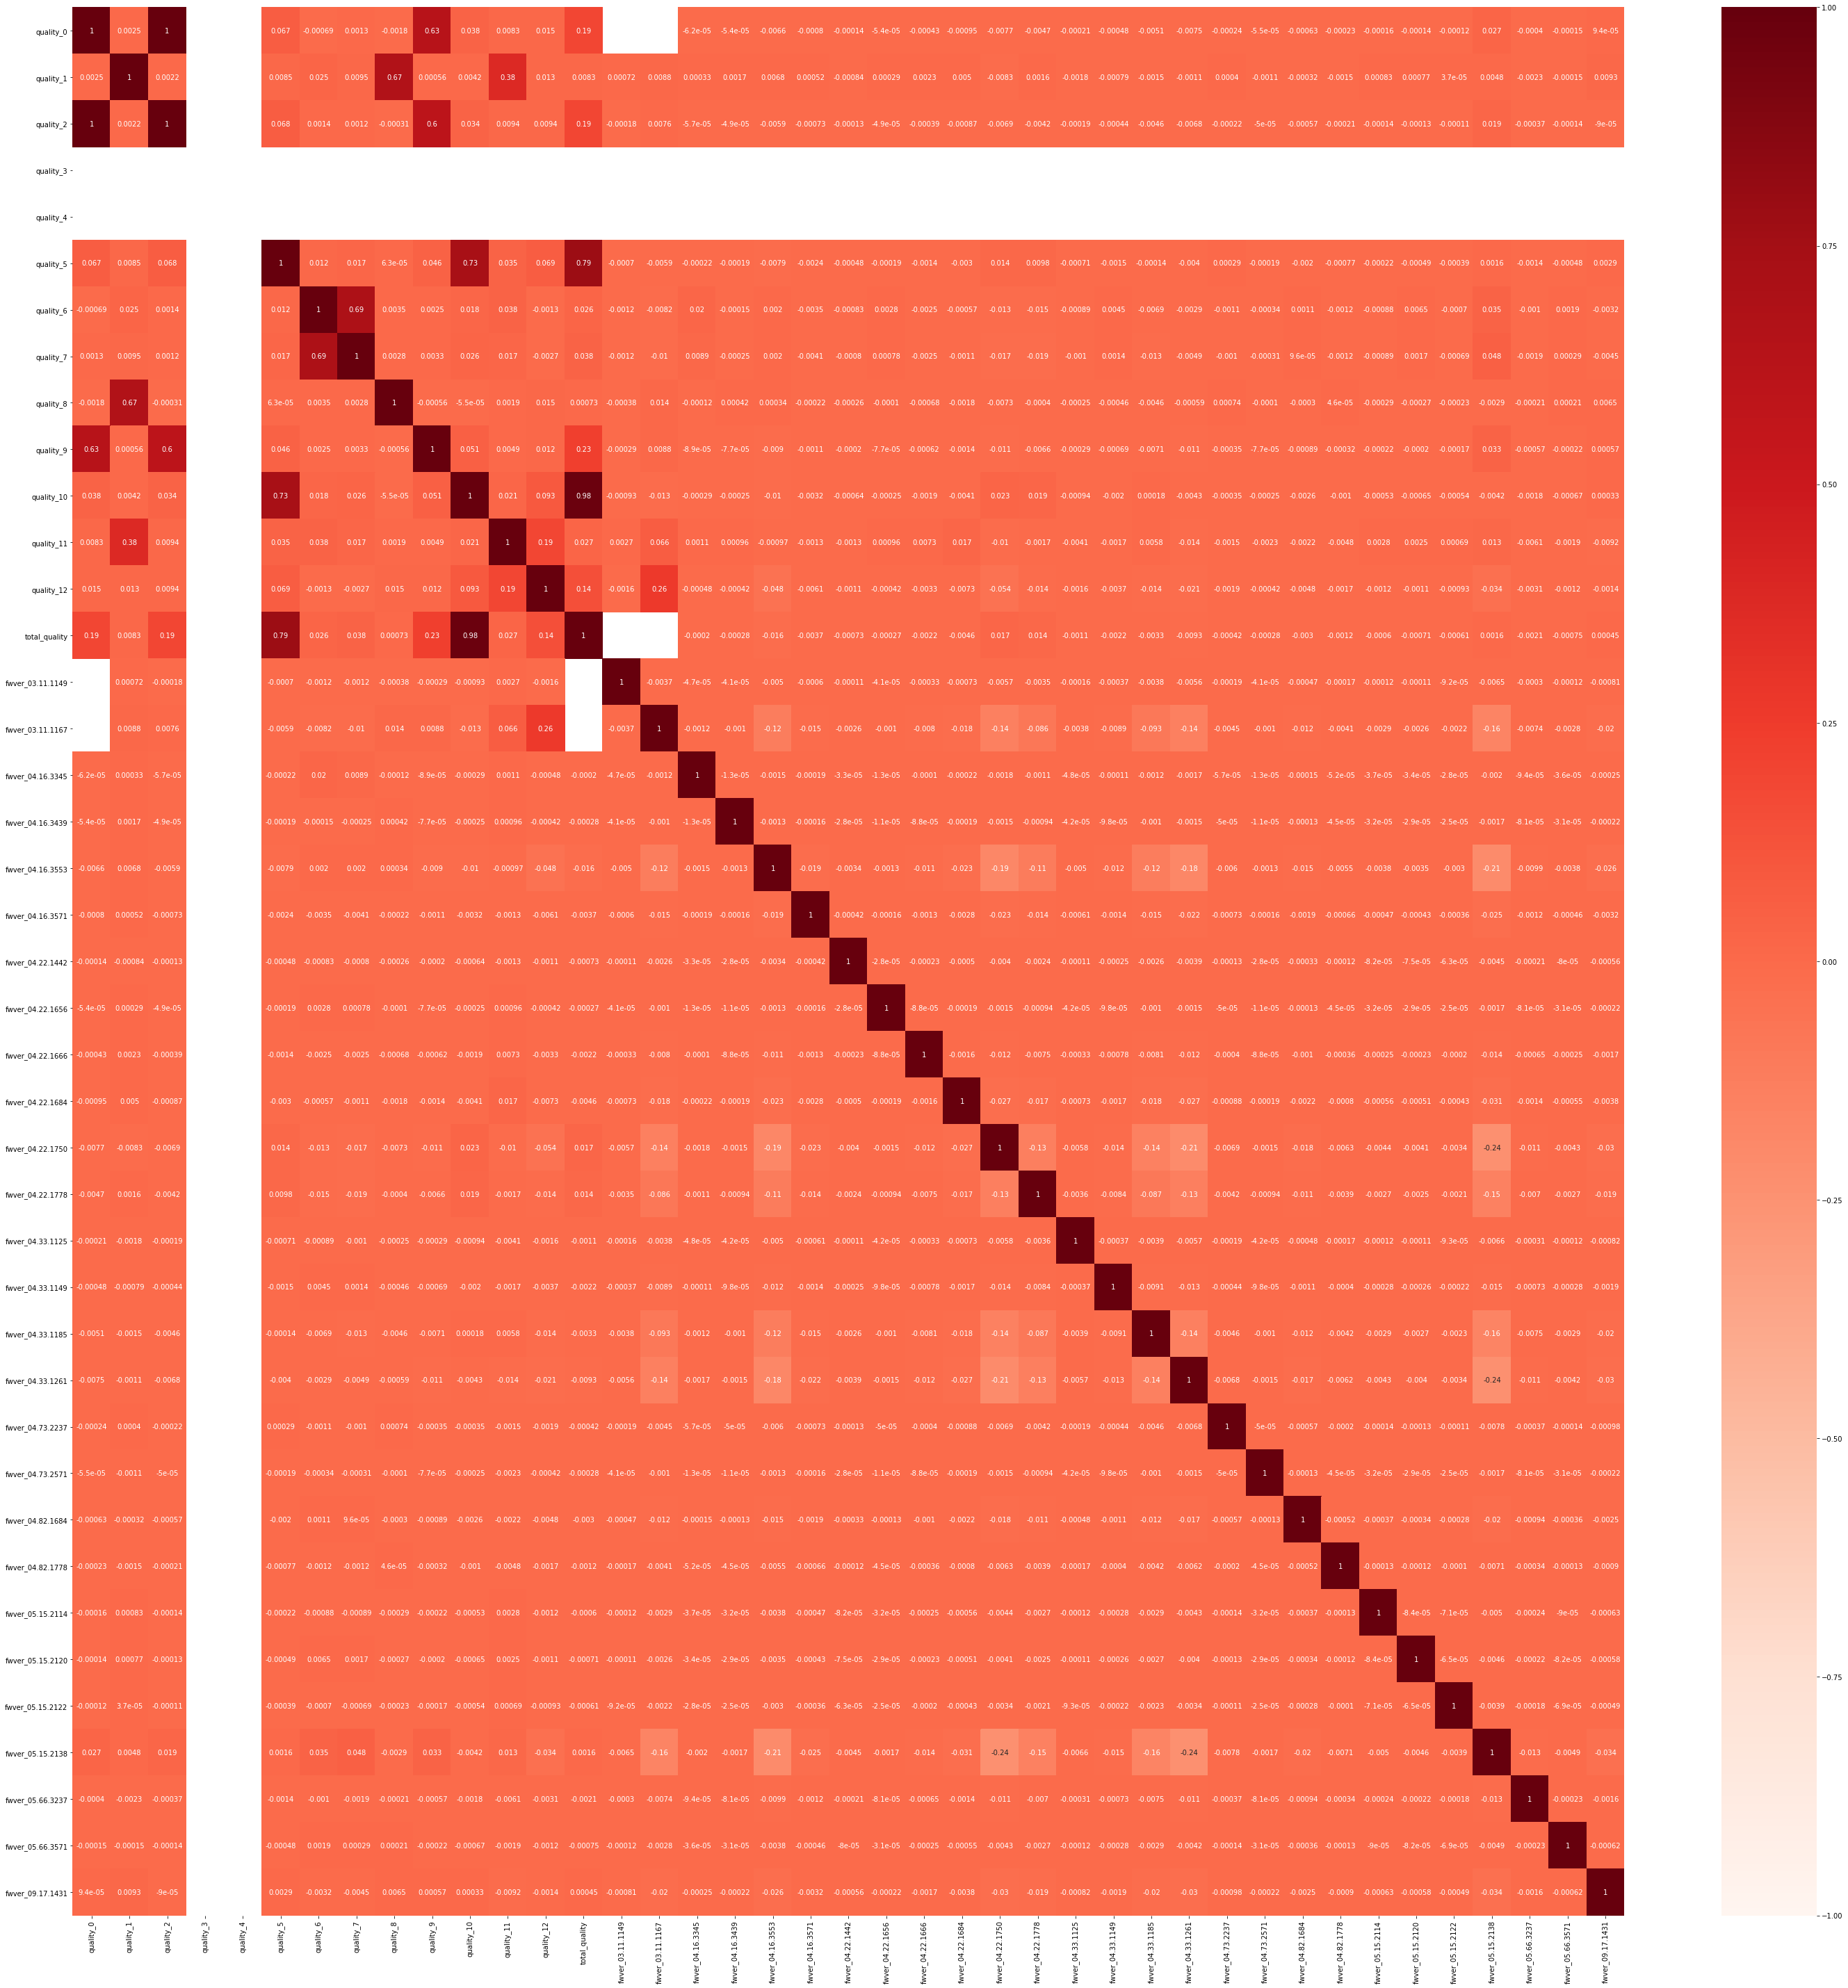

In [26]:
plt.figure(figsize=(50,50.50))
sns.heatmap(dummy.corr(),vmin=-1, vmax = 1, cmap='Reds', annot=True)
plt.show() 

In [27]:
# fwver와 오류와의 상관관계는 없다

In [28]:
train_quality.corr()

,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12,total_quality
quality_0,1.000000,0.002495,0.999535,NaN,NaN,0.067177,-0.000691,0.001315,-0.001783,0.627979,0.037517,0.008335,0.014966,0.191865
quality_1,0.002495,1.000000,0.002162,NaN,NaN,0.008520,0.024584,0.009523,0.666048,0.000563,0.004172,0.376916,0.012928,0.008344
quality_2,0.999535,0.002162,1.000000,NaN,NaN,0.068473,0.001366,0.001180,-0.000311,0.597480,0.034142,0.009410,0.009381,0.192233
quality_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
quality_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
quality_5,0.067177,0.008520,0.068473,NaN,NaN,1.000000,0.011878,0.016935,0.000063,0.045839,0.729015,0.034836,0.069370,0.785057
quality_6,-0.000691,0.024584,0.001366,NaN,NaN,0.011878,1.000000,0.693177,0.003544,0.002479,0.017855,0.037690,-0.001259,0.026400
quality_7,0.001315,0.009523,0.001180,NaN,NaN,0.016935,0.693177,1.000000,0.002753,0.003253,0.026256,0.016629,-0.002746,0.038290
quality_8,-0.001783,0.666048,-0.000311,NaN,NaN,0.000063,0.003544,0.002753,1.000000,-0.000564,-0.000055,0.001920,0.015121,0.000725
quality_9,0.627979,0.000563,0.597480,NaN,NaN,0.045839,0.002479,0.003253,-0.000564,1.000000,0.050633,0.004921,0.011791,0.233172


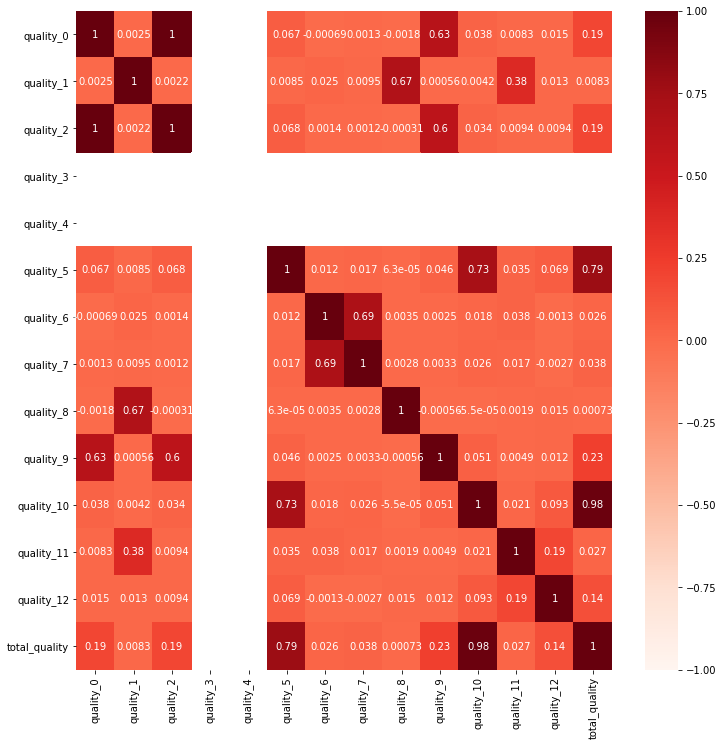

In [29]:
plt.figure(figsize=(12,12.12))
sns.heatmap(train_quality.corr(),vmin=-1, vmax = 1, cmap='Reds', annot=True)
plt.show()

In [30]:
# qulity 5 -10 / 6 - 7 / 0 -9 / 1 - 8 / 2 - 9 상관관계가 있다.

# 모든 fwver 버전

In [154]:
fwver_quality = pd.read_csv('data/fwver_quality.csv')
fwver_quality

,fwver,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
0,03.11.1149,0,1,4,0,0,24,1,0,0,6,42,1,0
1,03.11.1167,0,3079,3604,0,0,13315,3182,1219,1345,1972,18817,4415,4825
2,04.16.3345,0,0,0,0,0,0,3,4,0,0,0,0,0
3,04.16.3439,0,1,0,0,0,2,1,3,3,0,3,0,0
4,04.16.3553,3758,4571,3761,0,0,30122,5097,3045,2842,24,37050,3770,47
5,04.16.3571,69,85,69,0,0,457,88,49,50,0,616,69,0
6,04.22.1442,3,3,3,0,0,13,3,0,0,0,20,3,0
7,04.22.1656,0,0,0,0,0,0,2,3,0,0,0,0,0
8,04.22.1666,1,2,1,0,0,140,1,0,6,0,192,1,0
9,04.22.1684,2,3,2,0,0,647,18,34,3,0,930,2,0


In [192]:
fwver_quality.iloc[4:5,1].values

array([3758], dtype=int64)

In [213]:
fwver_all = pd.merge(g, fwver_quality, on='fwver', how='outer')
fwver_all = fwver_all.replace(np.NaN,0)
fwver_all = fwver_all.set_index('fwver')
fwver_all


,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
fwver,,,,,,,,,,,,,
03.11.1141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
03.11.1149,0.0,1.0,4.0,0.0,0.0,24.0,1.0,0.0,0.0,6.0,42.0,1.0,0.0
03.11.1167,0.0,3079.0,3604.0,0.0,0.0,13315.0,3182.0,1219.0,1345.0,1972.0,18817.0,4415.0,4825.0
04.16.2641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
04.16.3345,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0
04.16.3439,0.0,1.0,0.0,0.0,0.0,2.0,1.0,3.0,3.0,0.0,3.0,0.0,0.0
04.16.3553,3758.0,4571.0,3761.0,0.0,0.0,30122.0,5097.0,3045.0,2842.0,24.0,37050.0,3770.0,47.0
04.16.3569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
04.16.3571,69.0,85.0,69.0,0.0,0.0,457.0,88.0,49.0,50.0,0.0,616.0,69.0,0.0


In [214]:
fwver_all.to_csv(PATH + 'fwver_all.csv')

# train_quality - train_problem 간 상관관계

In [149]:
# 퀄리티 에러가 생긴 사람 중 불만을 접수한 사람
quality_problem = pd.merge(train_quality,train_problem, on='user_id')
quality_problem = quality_problem.rename({'time_x':'quality_time','time_y':'problem_time'}, axis='columns')
quality_problem = quality_problem[['fwver','quality_time','problem_time','quality_0','quality_1','quality_2','quality_3','quality_4','quality_5','quality_6','quality_7','quality_8','quality_9','quality_10','quality_11','quality_12','total_quality']]

quality_problem


KeyError: "['total_quality'] not in index"

In [36]:
# 15000명 중 불만을 표시한 사람 3082(만족하지 못했다.)
sr_complain = quality_problem.index.unique()
sr_complain

Int64Index([10004, 10005, 10006, 10013, 10019, 10021, 10027, 10038, 10047,
            10050,
            ...
            24934, 24951, 24953, 24964, 24965, 24967, 24977, 24984, 24990,
            24997],
           dtype='int64', name='user_id', length=3082)

In [37]:
complain_df = quality_problem.groupby('user_id').sum()
complain_df

,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12,total_quality
user_id,,,,,,,,,,,,,,
10004,-1.0,-1.0,-1.0,0.0,0.0,3.0,86.0,174.0,0.0,0.0,14.0,-1.0,0.0,273.0
10005,-1.0,-1.0,-1.0,0.0,0.0,7.0,35.0,108.0,0.0,0.0,30.0,-1.0,0.0,176.0
10006,0.0,0.0,0.0,0.0,0.0,36.0,12.0,24.0,0.0,0.0,72.0,0.0,0.0,144.0
10013,-7.0,-7.0,-7.0,0.0,0.0,312.0,-7.0,0.0,0.0,0.0,2063.0,-7.0,0.0,2340.0
10019,-4.0,17.0,-4.0,0.0,0.0,157678.0,344.0,4176.0,151.0,0.0,1003441.0,-4.0,0.0,1165795.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24967,-1.0,-1.0,-1.0,0.0,0.0,4.0,87.0,264.0,0.0,0.0,12.0,-1.0,0.0,363.0
24977,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,33.0,0.0,0.0,44.0
24984,-2.0,-2.0,-2.0,0.0,0.0,8192.0,91.0,279.0,0.0,0.0,16398.0,-2.0,0.0,24952.0


In [38]:
quality_problem_nan = quality_problem.replace(0,np.NaN)
quality_problem_nan

,fwver,quality_time,problem_time,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12,total_quality
user_id,,,,,,,,,,,,,,,,,
10004,04.22.1750,2020-11-02 23:20:00,2020-11-04 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,3.0
10004,04.22.1750,2020-11-02 23:20:00,2020-11-04 12:00:00,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,4.0
10004,04.22.1750,2020-11-02 23:20:00,2020-11-04 12:00:00,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,5.0
10004,04.22.1750,2020-11-02 23:20:00,2020-11-04 12:00:00,-1.0,-1.0,-1.0,NaN,NaN,-1.0,-1.0,NaN,NaN,NaN,3.0,-1.0,NaN,-3.0
10004,04.22.1750,2020-11-04 12:30:00,2020-11-04 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.0,NaN,NaN,1.0,NaN,NaN,88.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24997,04.22.1778,2020-11-24 03:30:00,2020-11-15 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,17.0
24997,04.22.1778,2020-11-24 03:30:00,2020-11-15 15:00:00,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,17.0,NaN,NaN,19.0
24997,04.22.1778,2020-11-24 03:30:00,2020-11-15 15:00:00,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,17.0,NaN,NaN,18.0


In [39]:
quality_problem_count = quality_problem_nan.groupby('user_id').count()[['quality_0','quality_1','quality_2','quality_3','quality_4','quality_5','quality_6','quality_7','quality_8','quality_9','quality_10','quality_11','quality_12']]
quality_problem_count


,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
user_id,,,,,,,,,,,,,
10004,1,1,1,0,0,4,2,2,0,0,6,1,0
10005,1,1,1,0,0,5,3,3,0,0,6,1,0
10006,0,0,0,0,0,9,3,6,0,0,18,0,0
10013,7,7,7,0,0,41,7,0,0,0,49,7,0
10019,4,16,4,0,0,61,5,12,17,0,79,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24967,1,1,1,0,0,3,2,3,0,0,5,1,0
24977,0,0,0,0,0,2,0,0,0,0,3,0,0
24984,2,2,2,0,0,6,3,3,0,0,9,2,0


In [40]:
# 불만 표현하지 않음
quality_noploblem = train_quality.drop(index=quality_problem_count.index)
quality_noploblem

,time,fwver,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12,total_quality
user_id,,,,,,,,,,,,,,,,
10000,2020-11-29 09:00:00,05.15.2138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0
10000,2020-11-29 09:00:00,05.15.2138,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,8.0
10000,2020-11-30 21:00:00,05.15.2138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,8.0
10000,2020-11-30 21:00:00,05.15.2138,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,16.0
10002,2020-11-04 11:00:00,05.15.2138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24992,2020-11-09 11:00:00,04.22.1750,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,12.0
24993,2020-11-30 20:30:00,05.15.2138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0
24993,2020-11-30 20:30:00,05.15.2138,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,10.0


In [41]:
quality_noploblem_nan = quality_noploblem.replace(0,np.NaN)
quality_noploblem_nan

,time,fwver,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12,total_quality
user_id,,,,,,,,,,,,,,,,
10000,2020-11-29 09:00:00,05.15.2138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,4.0
10000,2020-11-29 09:00:00,05.15.2138,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,8.0
10000,2020-11-30 21:00:00,05.15.2138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,8.0
10000,2020-11-30 21:00:00,05.15.2138,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,16.0
10002,2020-11-04 11:00:00,05.15.2138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24992,2020-11-09 11:00:00,04.22.1750,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,12.0
24993,2020-11-30 20:30:00,05.15.2138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,5.0
24993,2020-11-30 20:30:00,05.15.2138,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,10.0


In [42]:
quality_noploblem_count = quality_noploblem_nan.groupby('user_id').count()[['quality_0','quality_1','quality_2','quality_3','quality_4','quality_5','quality_6','quality_7','quality_8','quality_9','quality_10','quality_11','quality_12']]
quality_noploblem_count

,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
user_id,,,,,,,,,,,,,
10000,0,0,0,0,0,2,0,0,0,0,4,0,0
10002,2,1,2,0,0,13,4,6,0,2,20,1,0
10010,1,2,1,0,0,2,1,0,4,0,4,1,0
10012,0,0,0,0,0,3,0,0,0,0,5,0,0
10020,4,4,4,0,0,8,4,0,0,0,12,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24985,0,0,0,0,0,2,0,0,0,0,3,0,0
24986,5,8,5,0,0,24,6,4,7,0,30,5,0
24992,2,2,2,0,0,6,2,0,0,0,9,2,0


In [43]:
# 불만 표현하지 않음
quality_noploblem = train_quality.drop(index=quality_problem_count.index)
quality_noploblem

quality_noploblem_nan = quality_noploblem.replace(0,np.NaN)
quality_noploblem_nan

quality_noploblem_count = quality_noploblem_nan.groupby('user_id').count()[['quality_0','quality_1','quality_2','quality_3','quality_4','quality_5','quality_6','quality_7','quality_8','quality_9','quality_10','quality_11','quality_12']]
quality_noploblem_count

,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
user_id,,,,,,,,,,,,,
10000,0,0,0,0,0,2,0,0,0,0,4,0,0
10002,2,1,2,0,0,13,4,6,0,2,20,1,0
10010,1,2,1,0,0,2,1,0,4,0,4,1,0
10012,0,0,0,0,0,3,0,0,0,0,5,0,0
10020,4,4,4,0,0,8,4,0,0,0,12,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24985,0,0,0,0,0,2,0,0,0,0,3,0,0
24986,5,8,5,0,0,24,6,4,7,0,30,5,0
24992,2,2,2,0,0,6,2,0,0,0,9,2,0


In [85]:
quality_problem_count.sum(axis=1)[:1]

user_id
10004    18
dtype: int64

In [44]:
quality_problem_count[quality_problem_count['quality_12']>0]
# quality 3,4 오류는 없다. 9, 10 오류는 적다.

,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
user_id,,,,,,,,,,,,,
10150,6,6,6,0,0,24,6,0,0,0,33,7,3
10301,25,55,25,0,0,79,27,6,73,0,123,50,76
10531,0,14,14,0,0,61,13,0,3,3,88,24,28
10780,8,14,8,0,0,14,10,4,14,0,16,10,8
10822,12,18,12,0,0,68,60,88,22,0,78,14,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24749,0,16,9,0,0,21,9,0,15,0,27,51,94
24824,0,8,7,0,0,10,7,0,2,0,6,23,38
24934,0,30,29,0,0,323,29,3,7,4,358,57,102


In [45]:
quality_noploblem_count[quality_noploblem_count['quality_12']>0]

,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
user_id,,,,,,,,,,,,,
10167,0,34,30,0,0,99,30,0,11,0,136,52,55
10217,0,25,15,0,0,18,15,0,29,0,6,32,46
10265,0,6,188,0,0,212,18,43,15,261,294,8,17
10268,0,0,0,0,0,0,1,2,0,0,0,1,2
10346,9,9,9,0,0,44,9,0,0,0,60,11,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24402,76,8,76,0,0,86,26,59,0,98,98,9,9
24449,1,1,1,0,0,3,1,0,0,0,5,2,2
24489,16,2,16,0,0,18,7,11,0,23,23,3,4


# 정리

quality_noploblem # 불만표현하지 않은 id <br>
quality_problem # 불만을 표현한 id (-1)<br>
quality_problem_count # 불만표현한 id(count)<br>
quality_noploblem_count # 불만표현 안한 id(count)<br>
quality_problem.index.unique() # 퀄리티 오류로 인해 불만표현한 id 수 (3082)<br>
quality_noploblem.index.unique() # 퀄리티 오류는 떴으나 불만표현안한 id 수 (4940)

In [46]:
# quality_problem_count ->  
# 0 = 2260, 1 = 2387, 2 = 2337, 3 = 0, 4 = 0, 5 = 3035, 6 = 2520, 7 = 1045, 8 = 634, 9 = 124 , 10 = 2973,, 11 = 2333, 12 = 129
# quality_noploblem_count -> 
# 0 = 3147, 1 = 3535, 2 = 3437, 3 = 0, 4 = 0, 5 = 4863, 6 = 3768, 7 = 1125, 8 = 632, 9 = 256 , 10 = 4729, 11 = 3449, 12 = 148

In [121]:
quality_problem.index.unique() # 10003, 10007, 10008, 10009, 10011

Int64Index([10004, 10005, 10006, 10013, 10019, 10021, 10027, 10038, 10047,
            10050,
            ...
            24934, 24951, 24953, 24964, 24965, 24967, 24977, 24984, 24990,
            24997],
           dtype='int64', name='user_id', length=3082)

In [123]:
quality_noploblem.index.unique()

Int64Index([10000, 10002, 10010, 10012, 10020, 10022, 10025, 10030, 10032,
            10033,
            ...
            24969, 24979, 24980, 24981, 24982, 24985, 24986, 24992, 24993,
            24995],
           dtype='int64', name='user_id', length=4940)

In [48]:
quality_noploblem[quality_noploblem.values == -1]

,time,fwver,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12,total_quality
user_id,,,,,,,,,,,,,,,,
10002,2020-11-18 00:10:00,05.15.2138,-1.0,-1.0,-1.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,3.0,-1.0,0.0,-3.0
10002,2020-11-18 00:10:00,05.15.2138,-1.0,-1.0,-1.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,3.0,-1.0,0.0,-3.0
10002,2020-11-18 00:10:00,05.15.2138,-1.0,-1.0,-1.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,3.0,-1.0,0.0,-3.0
10002,2020-11-18 00:10:00,05.15.2138,-1.0,-1.0,-1.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,3.0,-1.0,0.0,-3.0
10002,2020-11-18 00:10:00,05.15.2138,-1.0,-1.0,-1.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,3.0,-1.0,0.0,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,2020-11-29 00:20:00,04.33.1261,-1.0,-1.0,-1.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,3.0,-1.0,0.0,-3.0
24995,2020-11-29 00:20:00,04.33.1261,-1.0,-1.0,-1.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,3.0,-1.0,0.0,-3.0
24995,2020-11-29 00:20:00,04.33.1261,-1.0,-1.0,-1.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,3.0,-1.0,0.0,-3.0


In [272]:
quality_problem[quality_problem.values == -1]

,fwver,quality_time,problem_time,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12,total_quality
user_id,,,,,,,,,,,,,,,,,
10004,04.22.1750,2020-11-02 23:20:00,2020-11-04 12:00:00,-1.0,-1.0,-1.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,3.0,-1.0,0.0,-3.0
10004,04.22.1750,2020-11-02 23:20:00,2020-11-04 12:00:00,-1.0,-1.0,-1.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,3.0,-1.0,0.0,-3.0
10004,04.22.1750,2020-11-02 23:20:00,2020-11-04 12:00:00,-1.0,-1.0,-1.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,3.0,-1.0,0.0,-3.0
10004,04.22.1750,2020-11-02 23:20:00,2020-11-04 12:00:00,-1.0,-1.0,-1.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,3.0,-1.0,0.0,-3.0
10004,04.22.1750,2020-11-02 23:20:00,2020-11-04 12:00:00,-1.0,-1.0,-1.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,3.0,-1.0,0.0,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24997,04.22.1750,2020-11-08 23:00:00,2020-11-15 15:00:00,-1.0,-1.0,-1.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,2.0,-1.0,0.0,-4.0
24997,04.22.1750,2020-11-08 23:00:00,2020-11-15 15:00:00,-1.0,-1.0,-1.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,2.0,-1.0,0.0,-4.0
24997,04.22.1750,2020-11-08 23:00:00,2020-11-15 15:00:00,-1.0,-1.0,-1.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,2.0,-1.0,0.0,-4.0


In [62]:
PATH = 'C:/Users/master19/Desktop/lg/data/'

In [ ]:
### user_id 당 퀄리티 에러로 인한 불만 신고 접수 유무에 따라 0(접수 x), 1로 구분

In [66]:
train_quality = pd.read_csv('data/train_quality_data.csv',  thousands=',', parse_dates=['time'])
train_err     = pd.read_csv('data/train_err_data.csv'    ,  thousands=',', parse_dates=['time'])

In [ ]:
train_quality.index

In [ ]:
train_err.index

In [137]:
err_problem_summary = pd.read_csv('data/err_problem_summary.csv')
err_problem_summary2 = pd.merge(err_problem_summary,quality_ox, on='user_id')
err_problem_summary2.head()

,Unnamed: 0,user_id,problem,start_t_errlog,rec_t_problem,time_interval_hour,n_errlogs,model,n_models,fwver,n_fwvers,errtype,n_errtypes,quality_problem
0,0,10000,0.0,2020-11-01 02:56:16,-1,-1,317,['model_3'],1,['05.15.2138'],1,[15 12 11 16 4 26 10 14 3 13 6 7 27 28],14,0.0
1,1,10001,1.0,2020-11-01 02:04:15,2020-11-13T19:00:00.000000000,"(304.0,)",2365,['model_2'],1,['04.33.1185' '04.33.1261'],2,[15 31 33 12 11 22 26 16 41 5 14 40 34 13 6 ...,26,0.0
2,2,10002,0.0,2020-11-01 03:02:51,-1,-1,306,['model_3'],1,['05.15.2138'],1,[11 12 16 4 26 15 24 27 28 13 3 7 6 14 5 10],16,0.0
3,3,10003,0.0,2020-11-01 18:25:32,-1,-1,306,['model_2'],1,['04.33.1185' '04.33.1261'],2,[15 16 31 40 22 23 26 6 7 5 17 38 33 12 11 ...,18,0.0
4,4,10004,1.0,2020-11-01 02:46:47,2020-11-04T12:00:00.000000000,"(81.0,)",777,['model_0'],1,['04.22.1750' '04.22.1778'],2,[13 12 14 6 7 15 33 11 22 26 16 31 23 40 4 ...,18,1.0


In [120]:
# quality에서 불만표출로 이어졌는가 1 , 0

id=[]
quality=[]
for i in tqdm(range(10000,25000)) :
    
    id.append(i)
    if quality_problem_count.sum(axis=1)[i-10000:i-9999].values>1 :
        quality.append([quality_problem.index.unique()-10000]==1)
    else :
         quality.append([quality_problem.index.unique()-10000]==0)

quality = np.zeros(15000)
quality[quality_problem.index.unique()-10000] = 1 
print(quality)

100%|██████████| 15000/15000 [00:27<00:00, 554.44it/s]

[0. 0. 0. ... 1. 0. 0.]


In [134]:
quality_ox=pd.DataFrame({'user_id':id,'quality_problem':quality})
quality_ox

,user_id,quality_problem
0,10000,0.0
1,10001,0.0
2,10002,0.0
3,10003,0.0
4,10004,1.0
...,...,...
14995,24995,0.0
14996,24996,0.0
14997,24997,1.0
14998,24998,0.0


# err_problem_summary2 업데이트 해야함 

In [141]:
err_problem_summary2.to_csv(PATH+'err_problem_summary2.csv')

In [ ]:
quality_type=[]
for i in tqdm(range(10000,25000)) :
    u_id = row['user_id']
    quality_df = quality_problem[quality_problem['user_id'] == u_id]
    e_type = quality_problem.errtype.unique()
    n_type = len(err_df.errtype.unique())
    errtypes.append(e_type)
    n_errtypes.append(n_type)

quality = np.zeros(15000)
quality[quality_problem.index.unique()-10000] = 1 
print(quality)

In [139]:
row['user_id']

NameError: name 'row' is not defined

In [ ]:
    u_id = row['user_id']
    err_df = train_err[train_err['user_id'] == u_id]